# EHealth 705

## Python Tutorial: Classification

###  TA: Shirin Shahabinejad : [shahas8@mcmaster.ca](mailto:shahas8@mcmaster.ca)

## Table of Content
1. [Exercise: Apply linear regression and Logistic regression to a health dataset.](#Practical_exercise)
2. [Classification: Naive Bayse, KNN, Decision Tree, SVM](#Classification)
3. [Exercise:Classification & Cross Validation For health Dataset](#CrossValidation)
4. [Q&A and Troubleshooting](#QA-and-Troubleshooting)
5. [Assignment2: Confidence Intervals](#Assignment)


#### Date : Apr  4th, 2024

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import ydata_profiling as pp
from collections import Counter
from scipy import stats

# !pip install pydataset
from pydataset import data
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder,  KBinsDiscretizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve



from sklearn.datasets import make_classification
from sklearn import neighbors
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Exercise: Apply linear regression and Logistic regression to a health data set. <a id="Practical_exercise"></a>


In [2]:
df = pd.read_csv("./insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
df.duplicated().sum()

1

In [4]:
df = df.drop_duplicates()
df.duplicated().sum()
df2 = df.copy()

In [5]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [6]:
le = LabelEncoder()
for col in cat_cols: 
    df[col] = le.fit_transform(df[col])
df

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1337 rows x 7 columns]

In [7]:
dummies = pd.get_dummies(df[cat_cols], drop_first=True)

# Drop the original categorical columns from the DataFrame
df = df.drop(cat_cols, axis=1)

# Concatenate the dummy variables to the original DataFrame
df = pd.concat([df, dummies], axis=1)
df.head()

age     bmi  children      charges  sex  smoker  region
0   19  27.900         0  16884.92400    0       1       3
1   18  33.770         1   1725.55230    1       0       2
2   28  33.000         3   4449.46200    1       0       2
3   33  22.705         0  21984.47061    1       0       1
4   32  28.880         0   3866.85520    1       0       1

In [8]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Perform one-hot encoding on the categorical columns
encoded_cols = encoder.fit_transform(df[cat_cols])

# Get the names for the new columns
new_cols = encoder.get_feature_names_out(cat_cols)

# Create a DataFrame with the new one-hot encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=new_cols)

# Reset index on the original DataFrame to allow for proper concatenation
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame (minus the categorical columns) with the new one-hot encoded DataFrame
df = pd.concat([df.drop(cat_cols, axis=1), encoded_df], axis=1)
df.head()

C:\Users\Shirin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


age     bmi  children      charges  sex_1  smoker_1  region_1  region_2  \
0   19  27.900         0  16884.92400    0.0       1.0       0.0       0.0   
1   18  33.770         1   1725.55230    1.0       0.0       0.0       1.0   
2   28  33.000         3   4449.46200    1.0       0.0       0.0       1.0   
3   33  22.705         0  21984.47061    1.0       0.0       1.0       0.0   
4   32  28.880         0   3866.85520    1.0       0.0       1.0       0.0   

   region_3  
0       1.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

In [9]:
#  DataFrame
X = df.drop('charges', axis=1)
y = df['charges']

# Scaling Age and BMI
scaler = StandardScaler()
X[['age', 'bmi']] = scaler.fit_transform(X[['age', 'bmi']])
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1069, 8), (1069,), (268, 8), (268,))

In [10]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

In [11]:
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 35478020.67523558
R² Score: 0.8069287081198013


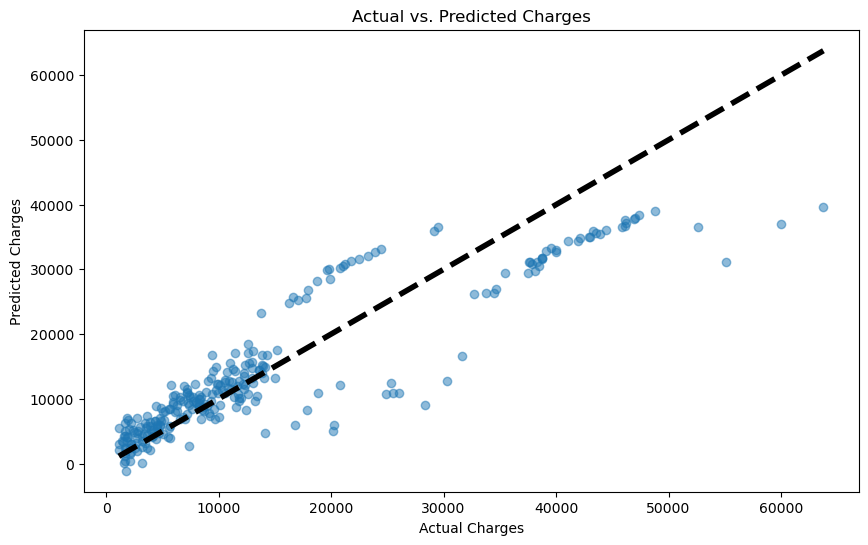

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


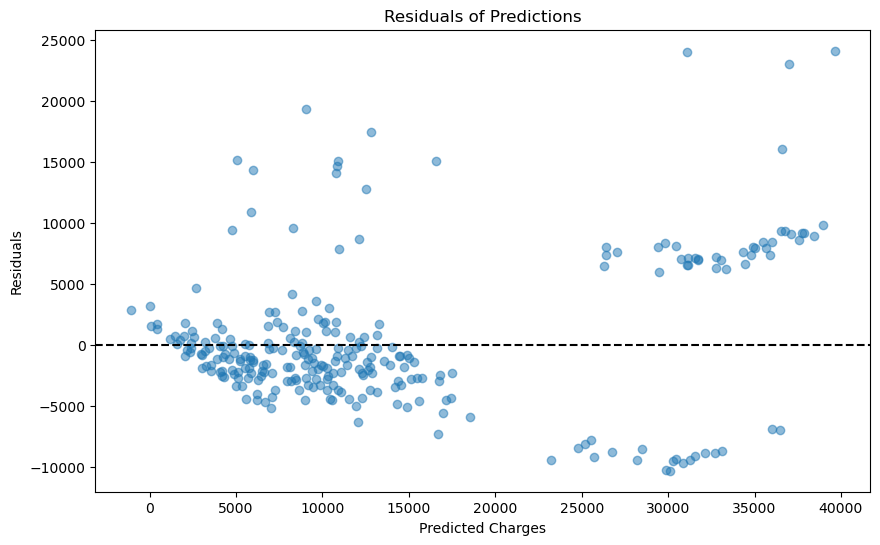

In [13]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()


## Logistic Regression

Accuracy: 0.9664179104477612
Confusion Matrix:
[[202   6]
 [  3  57]]


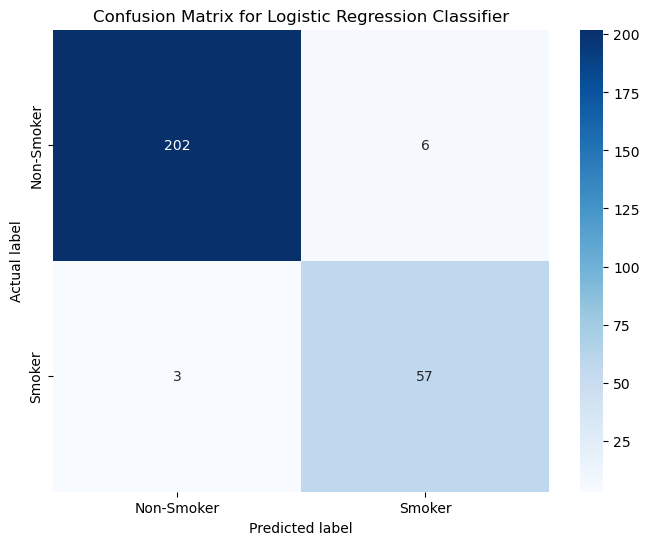

In [14]:
encoder = LabelEncoder()
df2['sex'] = encoder.fit_transform(df2['sex'])
df2['region'] = encoder.fit_transform(df2['region'])
df2['smoker'] = encoder.fit_transform(df2['smoker'])

# Separating features and target
X = df2.drop('smoker', axis=1)
y = df2['smoker']

# Scaling the features since charges may have a larger scale compared to others
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

C:\Users\Shirin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


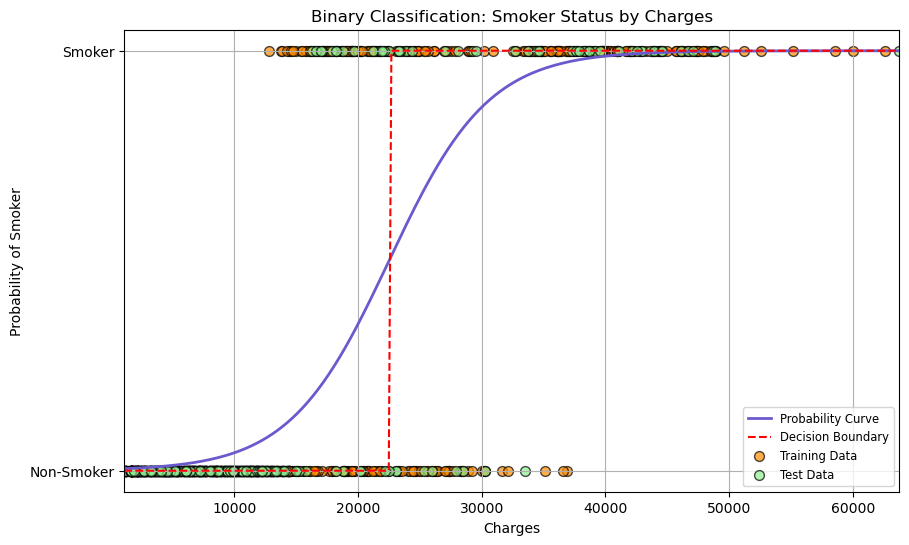

In [15]:
df = pd.read_csv("./insurance.csv")


# Encode 'smoker' as a binary variable
encoder = LabelEncoder()
df['smoker_binary'] = encoder.fit_transform(df['smoker'])

# Define features and target
X = df[['charges']]  # Continuous feature
y = df['smoker_binary']  # Binary target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Generate a smooth curve of predicted probabilities
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # Make sure it's a 2D array for sklearn
y_smooth = model.predict_proba(X_smooth)[:, 1]  # Predicted probabilities for being a smoker

# Binary predictions (for the plot, although logistic regression isn't usually for binary outcomes)
y_binary = (y_smooth > 0.5).astype(int)

# Plot
plt.figure(figsize=(10, 6))
# Smooth prediction curve
plt.plot(X_smooth, y_smooth, c='slateblue', label='Probability Curve', lw=2)
# Binary decision boundary
plt.plot(X_smooth, y_binary, 'r--', label='Decision Boundary')
# Scatter plot for training data
plt.scatter(X_train, y_train, c='darkorange', edgecolors='k', s=50, label='Training Data', alpha=0.7)
# Scatter plot for test data
plt.scatter(X_test, y_test, c='lightgreen', edgecolors='k', s=50, label='Test Data', alpha=0.7)
# Customize plot
plt.title('Binary Classification: Smoker Status by Charges')
plt.ylabel('Probability of Smoker')
plt.yticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.xlabel('Charges')
plt.xlim(X_smooth.min(), X_smooth.max())
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()

# Classification: Naive Bayse, KNN, Decision Tree, SVM<a id="Classification"></a>
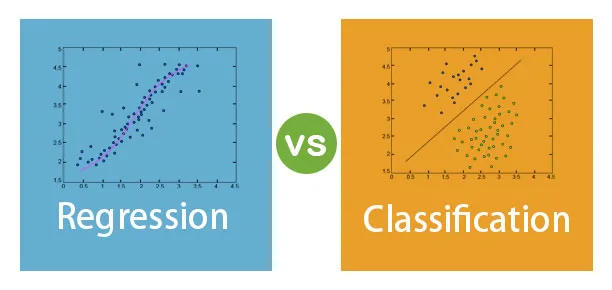



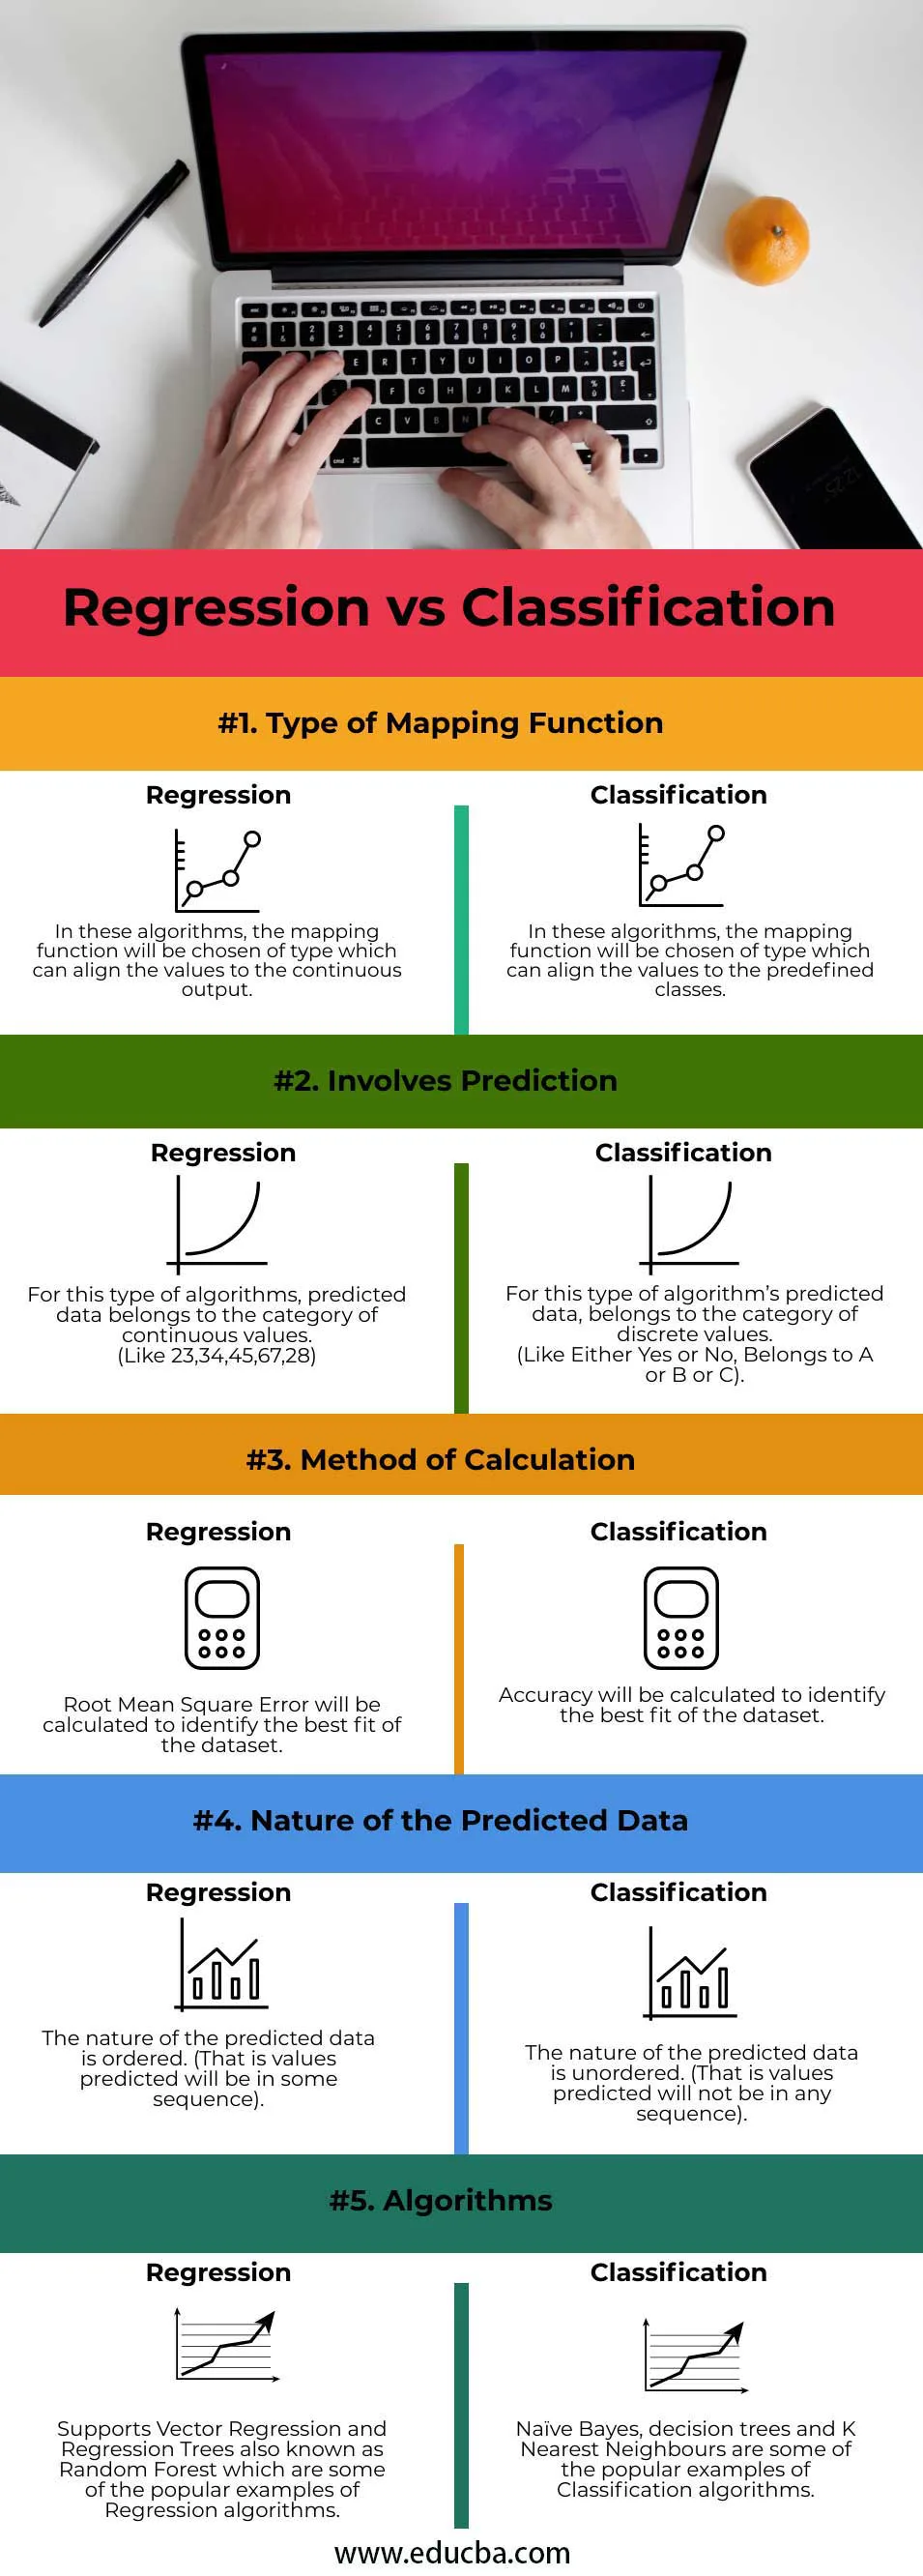









In [16]:
# Import raw data
df = data('titanic')

df.head()

class     age  sex survived
1  1st class  adults  man      yes
2  1st class  adults  man      yes
3  1st class  adults  man      yes
4  1st class  adults  man      yes
5  1st class  adults  man      yes

In [17]:
died = len([v for v in df['survived'] if v == 'no'])
survived = len([v for v in df['survived'] if v == 'yes'])

print(f'Died: {died}, survived: {survived}')



survived_100 = survived /df.shape[0] * 100

print(f'Percentage survived: {survived_100:.1f}%')


# Other Method:

survived = df['survived'].value_counts()
survived

Died: 817, survived: 499
Percentage survived: 37.9%


no     817
yes    499
Name: survived, dtype: int64

In [18]:
# Filter By Sex : Using Group by


grouped = df.groupby(['sex', 'survived']).count().iloc[:, 0]

print(grouped)

sex    survived
man    no          694
       yes         175
women  no          123
       yes         324
Name: class, dtype: int64


In [19]:
# Filter By Sex : Using Pivot Table


pt = pd.pivot_table(df, index='sex', columns='survived', aggfunc='count')

print(pt)

          age      class     
survived   no  yes    no  yes
sex                          
man       694  175   694  175
women     123  324   123  324


In [20]:
# Filter By Sex : Using Cross Table

ct = pd.crosstab(df['sex'], df['survived'])

print(ct)

survived   no  yes
sex               
man       694  175
women     123  324


In [21]:
# Men’s and Women’s Survival by Passenger Class


ct = pd.crosstab([df['sex'], df['class']], df['survived'])

print(ct)

survived          no  yes
sex   class              
man   1st class  118   62
      2nd class  154   25
      3rd class  422   88
women 1st class    4  141
      2nd class   13   93
      3rd class  106   90


In [22]:
percentages = ct.divide(ct.sum(axis=1), axis=0) * 100

print(percentages)

survived                no        yes
sex   class                          
man   1st class  65.555556  34.444444
      2nd class  86.033520  13.966480
      3rd class  82.745098  17.254902
women 1st class   2.758621  97.241379
      2nd class  12.264151  87.735849
      3rd class  54.081633  45.918367


### Decision Tree

Using a decision tree will essentially take the above information one step further: given details about a passenger and the survival rates calculated above we can classify that passenger as either a probable survivor or a probable non-survivor.

Firstly, we will re-format the data by separating out the target (dependent) variable from the predictor (independent) variables and converting the latter into binary values using the .get_dummies() method:

In [23]:
# Set the target and predictor variables
X = pd.get_dummies(df.iloc[:, :-1])
y = df['survived']

print(X.head())

   class_1st class  class_2nd class  class_3rd class  age_adults  age_child  \
1                1                0                0           1          0   
2                1                0                0           1          0   
3                1                0                0           1          0   
4                1                0                0           1          0   
5                1                0                0           1          0   

   sex_man  sex_women  
1        1          0  
2        1          0  
3        1          0  
4        1          0  
5        1          0  


In [24]:
print(y.head())

1    yes
2    yes
3    yes
4    yes
5    yes
Name: survived, dtype: object


In [25]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=20230808, test_size=0.3
)

In [26]:
# Create the model
model = tree.DecisionTreeClassifier(
    max_depth=3, ccp_alpha=0.01, random_state=20230808
)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3, random_state=20230808)

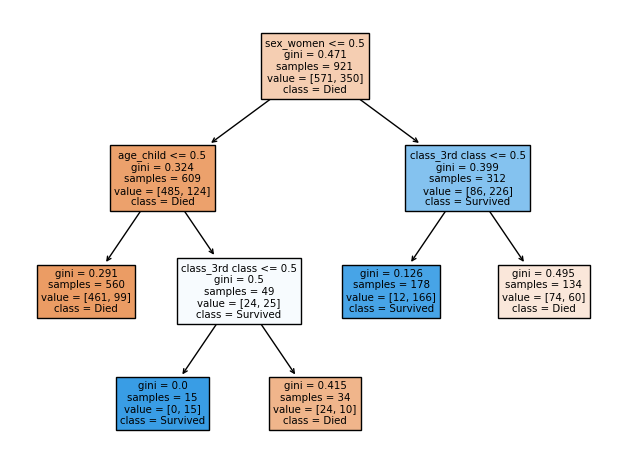

In [27]:
# Plot
tree.plot_tree(
    model, feature_names=list(X_train),
    class_names=['Died', 'Survived'], filled=True
)
plt.tight_layout()
plt.show()

In [28]:

text_tree = tree.export_text(model, feature_names=list(X_train.columns))
print(text_tree)

|--- sex_women <= 0.50
|   |--- age_child <= 0.50
|   |   |--- class: no
|   |--- age_child >  0.50
|   |   |--- class_3rd class <= 0.50
|   |   |   |--- class: yes
|   |   |--- class_3rd class >  0.50
|   |   |   |--- class: no
|--- sex_women >  0.50
|   |--- class_3rd class <= 0.50
|   |   |--- class: yes
|   |--- class_3rd class >  0.50
|   |   |--- class: no



In [29]:
# Confirm Gini impurity for the root node
value = [571, 350]
gini = 1 - sum([(x / sum(value))**2 for x in value])

print(f'Gini impurity, IG = {gini:.3f}')

Gini impurity, IG = 0.471


In [30]:
# Make predictions
y_pred = model.predict(X_test)
# Accuracy of the predictions
acc = metrics.accuracy_score(y_test, y_pred)

print(f'Accuracy = {acc:.2f}')

Accuracy = 0.78


# Exercise:Classification With Cross Validation For health Dataset<a id="CrossValidation"></a>



About the Data set
This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (diseaselnon disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.
Attribute Information
- Age (age in years)
- $\operatorname{Sex}(1=$ male; 0 = female $)$
- $\mathrm{CP}$ (chest pain type)
- TRESTBPS (resting blood pressure (in $\mathrm{mm} \mathrm{Hg}$ on admission to the hospital))
- CHOL (serum cholestoral in $\mathrm{mg} / \mathrm{dl}$ )
- FPS (fasting blood sugar $>120 \mathrm{mg} / \mathrm{dl})(1=$ true; $0=$ false $)$
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina ( $1=$ yes; $0=$ no))
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by flourosopy)
- THAL ( $3=$ normal; $6=$ fixed defect; $7=$ reversable defect )
- TARGET ( 1 or 0 )

In [31]:
data = pd.read_csv('./heart.csv')
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [32]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
# Setting Target and predictors

y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [34]:
# data imbalacing problem 

print(y_test.unique())

Counter(y_train)


[1 0]


Counter({1: 419, 0: 401})

## ML models:
1. Logistic Regression
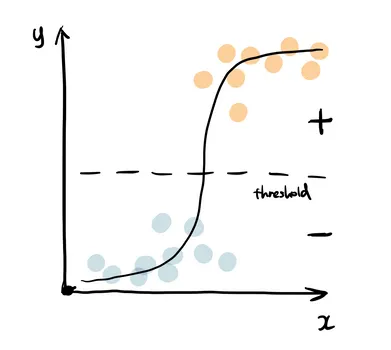

Logistics regression uses sigmoid function above to return the probability of a label. It is widely used when the classification problem is binary — true or false, win or lose, positive or negative ...

The sigmoid function generates a probability output. By comparing the probability with a pre-defined threshold, the object is assigned to a label accordingly. Check out my posts on logistic regression for a detailed walkthrough.


2. Naive Bayes

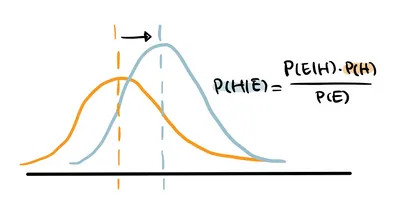

Naive Bayes is based on Bayes’ Theorem — an approach to calculate conditional probability based on prior knowledge, and the naive assumption that each feature is independent to each other. The biggest advantage of Naive Bayes is that, while most machine learning algorithms rely on large amount of training data, it performs relatively well even when the training data size is small. Gaussian Naive Bayes is a type of Naive Bayes classifier that follows the normal distribution.

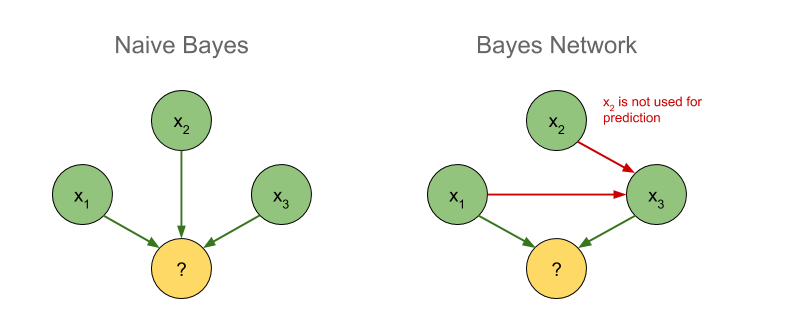
3. Random Forest Classifier

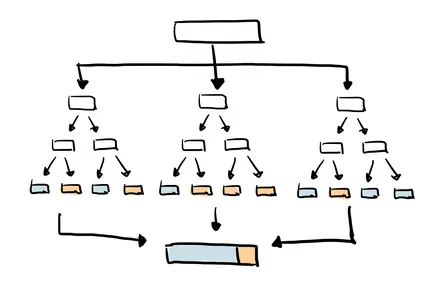

As the name suggest, random forest is a collection of decision trees. It is a common type of ensemble methods which aggregate results from multiple predictors. Random forest additionally utilizes bagging technique that allows each tree trained on a random sampling of original dataset and takes the majority vote from trees. Compared to decision tree, it has better generalization but less interpretable, because of more layers added to the model.


4. Extreme Gradient Boost

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

5. K-Nearest Neighbour

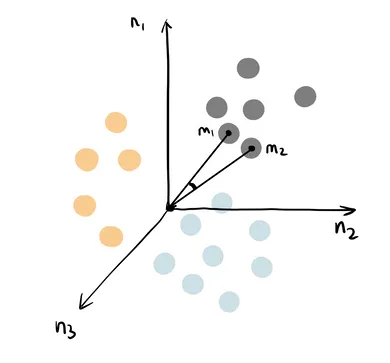


You can think of k nearest neighbour algorithm as representing each data point in a n dimensional space — which is defined by n features. And it calculates the distance between one point to another, then assign the label of unobserved data based on the labels of nearest observed data points. 

6. Decision Tree

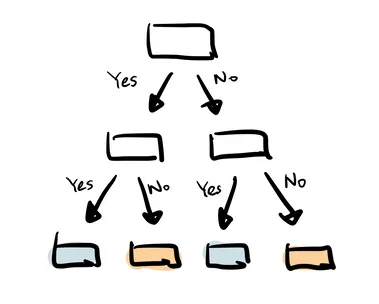

Decision tree builds tree branches in a hierarchy approach and each branch can be considered as an if-else statement. The branches develop by partitioning the dataset into subsets based on most important features. Final classification happens at the leaves of the decision tree.

7. Support Vector Machine


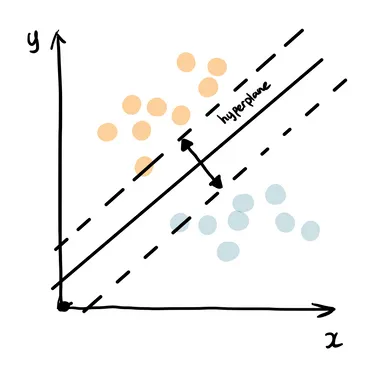

Support vector machine finds the best way to classify the data based on the position in relation to a border between positive class and negative class. This border is known as the hyperplane which maximize the distance between data points from different classes. Similar to decision tree and random forest, support vector machine can be used in both classification and regression, SVC (support vector classifier) is for classification problem.



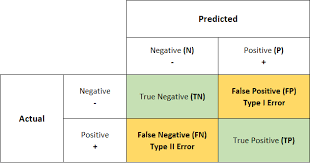

In [35]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [36]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[79 19]
 [11 96]]


Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [37]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))


confussion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Random Forest: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [38]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Extreme Gradient Boost: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [39]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [40]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of DecisionTreeClassifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [41]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



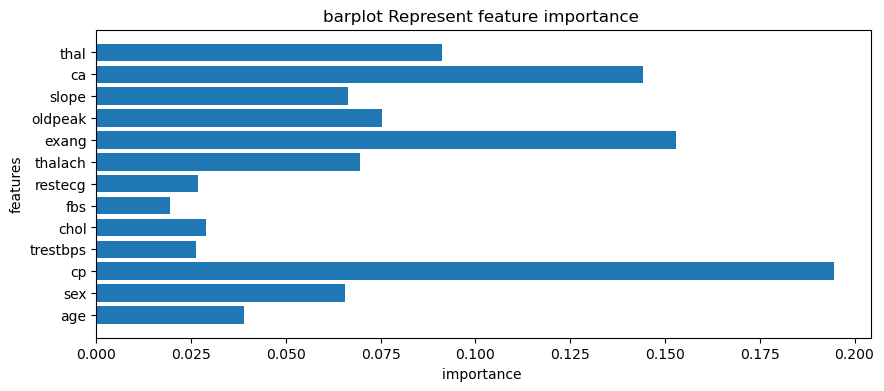

In [42]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

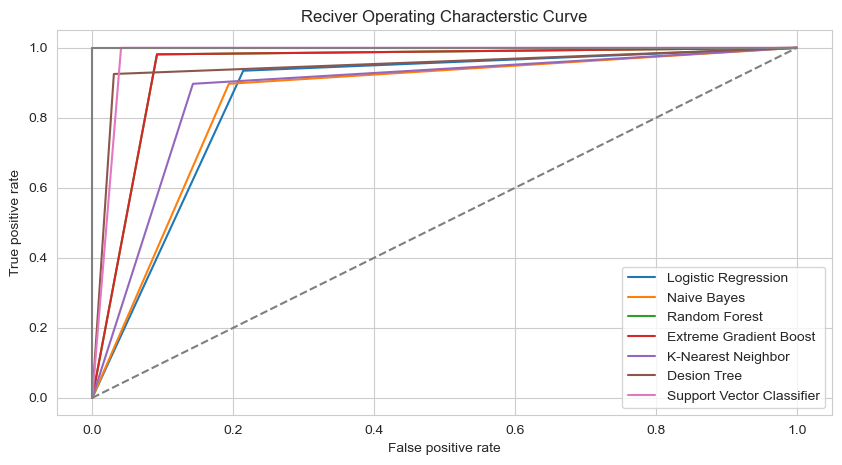

In [43]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [44]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

Model   Accuracy
0     Logistic Regression  86.341463
1             Naive Bayes  85.365854
2           Random Forest  94.634146
3  Extreme Gradient Boost  94.634146
4     K-Nearest Neighbour  87.804878
5           Decision Tree  94.634146
6  Support Vector Machine  98.048780

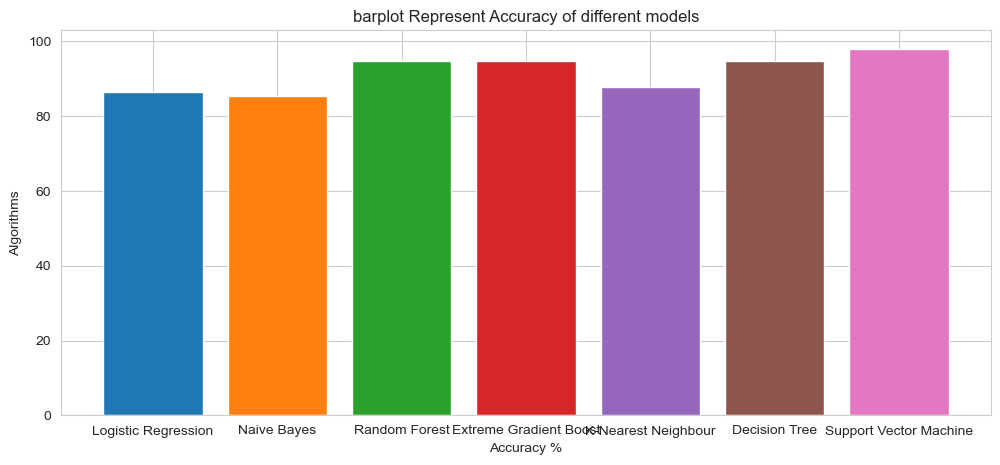

In [45]:
colors = sns.color_palette()
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'], color = colors)
plt.show()

In [46]:

# Setting Target and predictors
y = data["target"]
X = data.drop('target',axis=1)

# Initialize the KFold parameters
kf = KFold(n_splits=5, random_state=0, shuffle=True)  # Number of splits can be chosen as needed

# This will store our transformed training and validation sets for each fold
fold_splits = []

scaler = StandardScaler()

# Splitting data using k-fold
for train_index, val_index in kf.split(X):
    # Splitting Data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Scaling Data - Note: we fit the scaler on the training data and transform on both the training and validation data.
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Storing the splits for potential later use
    fold_splits.append((X_train_scaled, X_val_scaled, y_train, y_val))


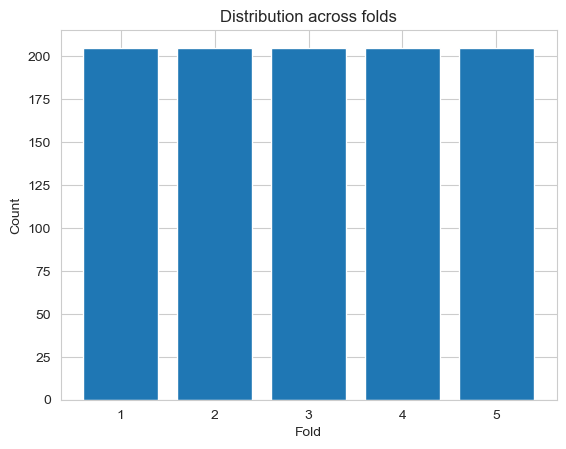

In [47]:
import matplotlib.pyplot as plt

# Visualizing k-fold cross-validation
def visualize_kfold_splits(kf, X, y):
    folds = np.zeros(len(y))

    for fold, (train, val) in enumerate(kf.split(X)):
        folds[val] = fold + 1  # Label each validation set with the fold number

    plt.hist(folds, bins=np.arange(1, kf.n_splits+2)-0.5, rwidth=0.8)
    plt.xticks(np.arange(1, kf.n_splits+1))
    plt.xlabel('Fold')
    plt.ylabel('Count')
    plt.title('Distribution across folds')
    plt.show()

visualize_kfold_splits(kf, X, y)


# Q&A and Troubleshooting<a id="QA-and-Troubleshooting"></a>

#### Practical Exercise Solutions and Insights

- **Exploring Logistic Regression**:
  - [Scikit-learn Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  - [Logistic Regression Overview](https://www.sciencedirect.com/topics/computer-science/logistic-regression#:~:text=Logistic%20regression%20is%20a%20process,%2Fno%2C%20and%20so%20on.)
  - [Detailed Overview of Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
  - [Understanding Logistic Regression](https://www.geeksforgeeks.org/understanding-logistic-regression/)
  - [Logistic Regression Simplified](https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389)
  - [A Step-by-Step Explanation of Logistic Regression](https://medium.com/@satyarepala/understanding-logistic-regression-a-step-by-step-explanation-9a404344964b)
  - [Building a Logistic Regression in Python](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)
  - [Logistic Regression in Python](https://medium.datadriveninvestor.com/logistic-regression-in-python-423c8d32838b)
  - [Health Insurance Lead Prediction](https://www.kaggle.com/code/sureshmecad/health-insurance-lead)
  - [Predicting Healthcare Insurance Costs Using ML](https://www.kaggle.com/code/yaminh/predicting-healthcare-insurance-costs-using-ml)
  - [Logistic Regression Classifier Tutorial](https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial)
  - [Logistic Regression Implementation](https://www.kaggle.com/code/kanncaa1/logistic-regression-implementation)
  - [Alice Logistic Regression Baseline](https://www.kaggle.com/code/kashnitsky/alice-logistic-regression-baseline)
  - [Predicting Medical Charges Using Linear Regression](https://www.kaggle.com/code/sarahmashhood/predicting-medical-charges-using-linear-regression)
  - [Insurance Data Modeling: Linear Regression](https://www.kaggle.com/code/galalqassas/insurance-data-modeling-linear-regression)
  - [US Health Insurance Dataset Analysis](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/code)
  - [Regression Modelling Using Insurance Dataset](https://www.kaggle.com/code/maverickss26/regression-modellng-using-insurance-dataset)
  - [Health Insurance Dataset Exploration](https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset/data)
  - [Bayesian Approaches in Python](https://ethanweed.github.io/pythonbook/06.01-bayes.html)
  - [Logistic Regression in Python](https://rowannicholls.github.io/python/machine_learning/supervised_models/logistic_regression.html)

#### Datasets for Practice

- **Datasets for Linear Regression Exercises**:
  - [Health Insurance Dataset](https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset/data)
  - [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

#### Additional Resources for Machine Learning

- **Further Learning Materials and Examples**:
  - [Decision Trees in Python](https://rowannicholls.github.io/python/machine_learning/supervised_models/decision_trees.html)
  - [Top Machine Learning Algorithms for Classification](https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501)
  - [EDA & Classification Ensemble with 92% Accuracy](https://www.kaggle.com/code/nareshbhat/eda-classification-ensemble-92-accuracy/notebook)
  - [Heart Disease EDA with 7 Machine Learning Models](https://www.kaggle.com/code/akashkotal/heart-disease-eda-with-7-machine-learning-model)
  - [K Nearest Neighbours Classifier in Python](https://rowannicholls.github.io/python/machine_learning/supervised_models/k_nearest_neighbours_classifier.html)
  - [Support Vector Machines in Python](https://rowannicholls.github.io/python/machine_learning/supervised_models/support_vector_machines.html)
  
  - [Gradient Boosting Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#:~:text=Gradient%20Boosting%20for%20classification.,binary%20or%20multiclass%20log%20loss.)


# Assignment <a id="Assignment"></a>




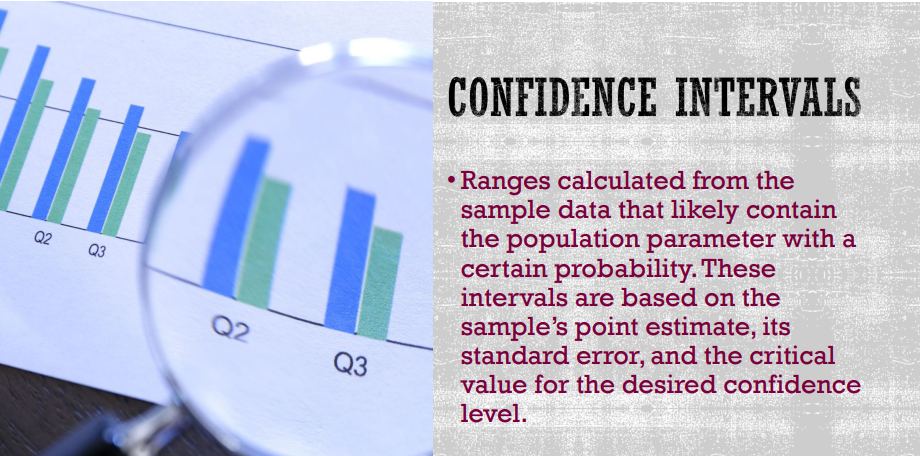


In [48]:
data = pd.read_csv('older_women_health_data.csv')

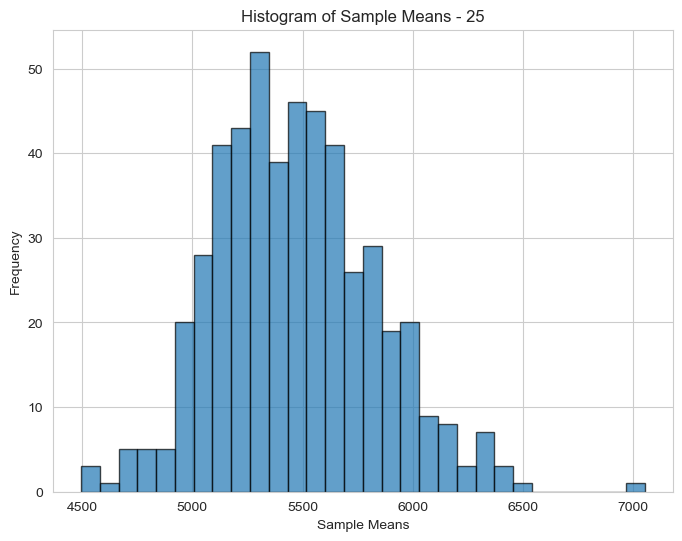

Summary Statistics for Sample_Means_Size_25:
       Sample Means
count    500.000000
mean    5468.218879
std      360.008553
min     4494.964000
25%     5214.684700
50%     5454.166800
75%     5688.943200
max     7051.152400


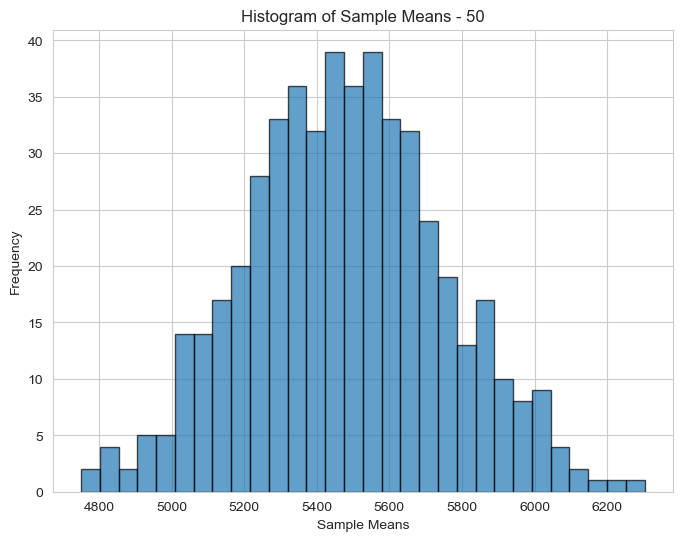

Summary Statistics for Sample_Means_Size_50:
       Sample Means
count    500.000000
mean    5476.962754
std      272.661729
min     4750.313000
25%     5292.861050
50%     5473.118800
75%     5655.146750
max     6302.959000


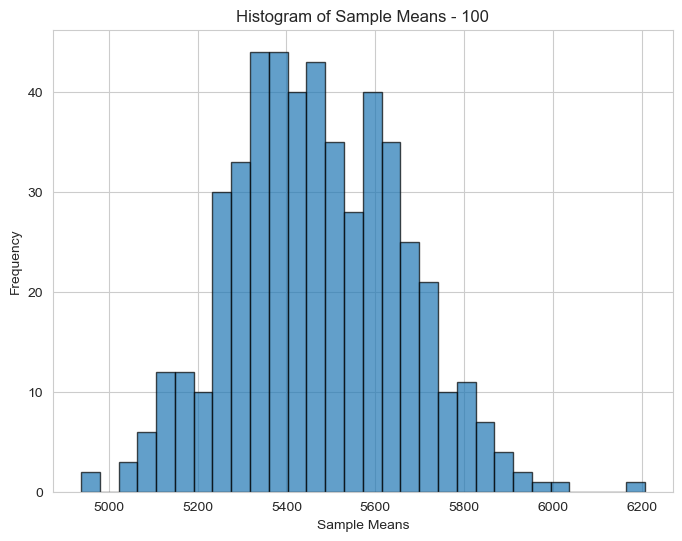

Summary Statistics for Sample_Means_Size_100:
       Sample Means
count    500.000000
mean    5470.054804
std      190.688007
min     4937.452700
25%     5335.713600
50%     5459.356850
75%     5609.017825
max     6206.156100


In [49]:
np.random.seed(23) #Selecting random.seed() to ensure reproducibility  

#Set number of samples. Create sample size list to loop between each number for simplicity. 
num_samples = 500
sample_sizes = [25, 50, 100]

# Initialize dictionary to store sample means data frames
sample_means_dfs = {}

# Generate sample means distributions for each sample size from the 'sample_sizes' list using a loop
for sample_size in sample_sizes:
    # Initialize list to store sample means
    sample_means = []
    
    # Generate 500 samples of the specified size using random.choice() from the 'HealEx20' category and calculate the mean for each sample
    for i in range(num_samples):
        sample = np.random.choice(data['HealEx20'], size=sample_size, replace=False)
        #Append mean to list of sample means for easier access and reference
        sample_means.append(np.mean(sample))
    
    # Convert list of sample means into a data frame and name it properly
    df_name = f'Sample_Means_Size_{sample_size}'
    sample_means_df = pd.DataFrame(sample_means, columns=['Sample Means'])
    sample_means_df.name = df_name
    
    # Save data frame to dictionary
    sample_means_dfs[df_name] = sample_means_df
    
    # Plot histogram, set axes and titles
    plt.figure(figsize=(8, 6))
    plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Sample Means - {sample_size}')
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')
    plt.show()
    
    # Run summary statistics
    print(f"Summary Statistics for {df_name}:")
    print(sample_means_df.describe(include='all'))

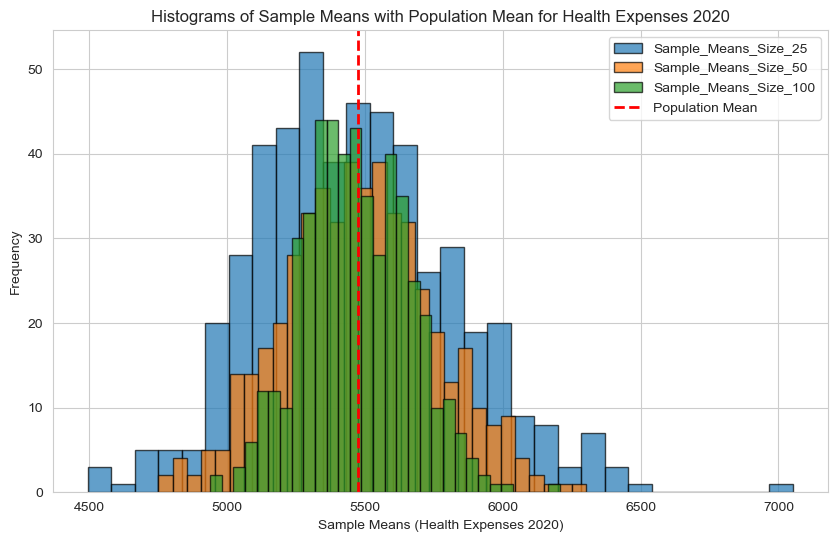

In [50]:
#Selecting same random.seed() to ensure same sampling data
np.random.seed(23)

#Population mean is defined from the original dataframe 
population_mean = data['HealEx20'].mean()

# Plot histograms for each sample size 
plt.figure(figsize=(10, 6))

#Loop between the different sample sizes as defined in the list from the previous task
for df_name, df in sample_means_dfs.items():
    plt.hist(df['Sample Means'], bins=30, edgecolor='black', alpha=0.7, label=df_name)
    
# Plot vertical line for population mean
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')

#Set titles
plt.title('Histograms of Sample Means with Population Mean for Health Expenses 2020')
plt.xlabel('Sample Means (Health Expenses 2020)')
plt.ylabel('Frequency')
plt.legend()


In [51]:
samples_expenses = {}
sample_sizes = [25, 50, 100]
for size in sample_sizes:
    samples_expenses[size] = np.random.choice(data["HealEx20"], size = size, replace = False)

The 95% CI for the sample with a size of 25 is 5429.60 to 7151.11. The width of the CI is 1721.51.
The 95% CI for the sample with a size of 50 is 4923.45 to 6052.00. The width of the CI is 1128.55.
The 95% CI for the sample with a size of 100 is 4842.62 to 5522.66. The width of the CI is 680.04.


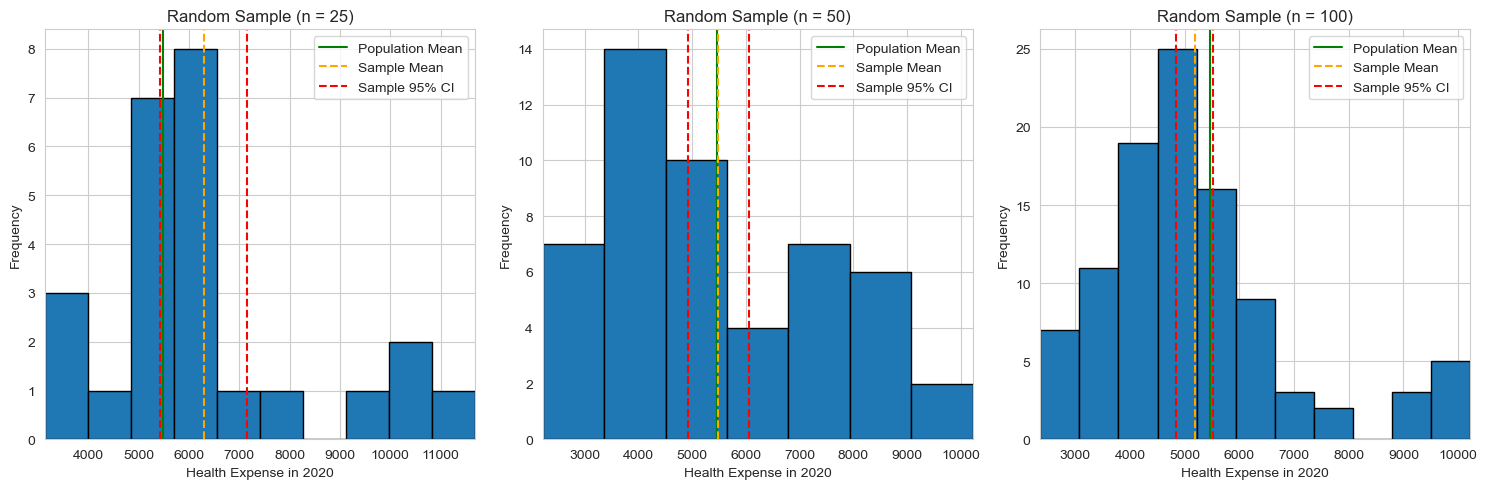

In [52]:
cis = {}

plt.figure(figsize= (15,5))
counter = 1
for size in samples_expenses:
    sample_data = samples_expenses[size]
    mean = np.mean(sample_data)
    cis[size] = 1.96 * np.std(sample_data) / np.sqrt(size)
    print(f"The 95% CI for the sample with a size of {size} is {mean - cis[size] :.2f} to {mean + cis[size] :.2f}. The width of the CI is {cis[size] * 2 :.2f}.")
    
    plt.subplot(1, 3, counter)
    plt.hist(sample_data, edgecolor='black', bins='auto')  # Using 'auto' to let matplotlib decide the number of bins
    plt.title(f"Random Sample (n = {size})")
    plt.ylabel('Frequency')
    plt.xlabel('Health Expense in 2020')
    
    pop_mean = np.mean(data["HealEx20"])
    plt.axvline(pop_mean, color='green', linestyle='solid', label='Population Mean')
    plt.axvline(mean, color='orange', linestyle='dashed', label='Sample Mean')
    plt.axvline(mean - cis[size], color='red', linestyle='dashed', label='Sample 95% CI')
    plt.axvline(mean + cis[size], color='red', linestyle='dashed')
    plt.legend()
    
    # Set xlim to be tight around the sample data
    plt.xlim(min(sample_data), max(sample_data))
    
    counter += 1
  
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


The 95% CI for the sample with a size of 25 is 5365.29 to 7215.43. The width of the CI is 1850.14.
The 95% CI for the sample with a size of 50 is 4903.31 to 6072.14. The width of the CI is 1168.84.
The 95% CI for the sample with a size of 100 is 4836.69 to 5528.60. The width of the CI is 691.91.


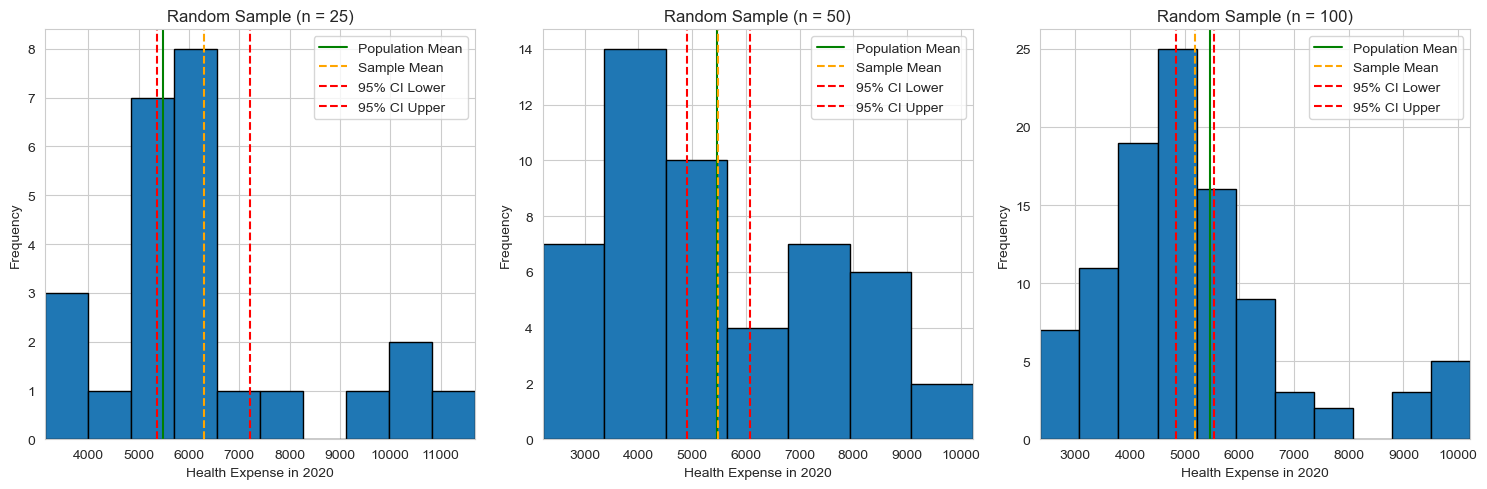

In [53]:

cis = {}
plt.figure(figsize= (15,5))
counter = 1

for size in samples_expenses:
    sample_data = samples_expenses[size]
    mean = np.mean(sample_data)
    cis[size] = stats.t.interval(0.95,
                 df = size - 1,
                 loc = mean, 
                 scale= np.std(sample_data, ddof=1) / np.sqrt(size))
    
    print(f"The 95% CI for the sample with a size of {size} is {cis[size][0]:.2f} to {cis[size][1]:.2f}. The width of the CI is {(cis[size][1] - cis[size][0]):.2f}.")
    
    plt.subplot(1, 3, counter)
    plt.hist(sample_data, edgecolor='black', bins='auto')  # 'auto' lets matplotlib choose the number of bins
    plt.title(f"Random Sample (n = {size})")
    plt.ylabel('Frequency')
    plt.xlabel('Health Expense in 2020')
    
    population_mean = np.mean(data["HealEx20"])
    plt.axvline(population_mean, color='green', linestyle='solid', label='Population Mean')
    plt.axvline(mean, color='orange', linestyle='dashed', label='Sample Mean')
    plt.axvline(cis[size][0], color='red', linestyle='dashed', label='95% CI Lower')
    plt.axvline(cis[size][1], color='red', linestyle='dashed', label='95% CI Upper')
    plt.legend()
    
    # Set xlim to the range of the current sample's expenses
    plt.xlim(min(sample_data), max(sample_data))
    
    counter += 1

plt.tight_layout()  # Adjust the layout
plt.show()

Conclusion: The point of this question was to take a new sample 20,100,500 and compare the mean and std with the one from CLT ( CLT_mean = sample_mean; CLT_std/ n = sample_std), sample size increase confidence interval decrease; also std known we have smaller confidence intervals compare to unknown std.
